In [38]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn import datasets

# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

# 군집화(Clustering)
- 비지도학습으로 정답없이, 특징만 가지고 있는 데이터로 모델을 구현

### 문제 정의   
: 키와 몸무게로 학생들을 3그룹으로 분류

In [15]:
df = pd.read_csv('../Data/student_kmeans.csv')
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


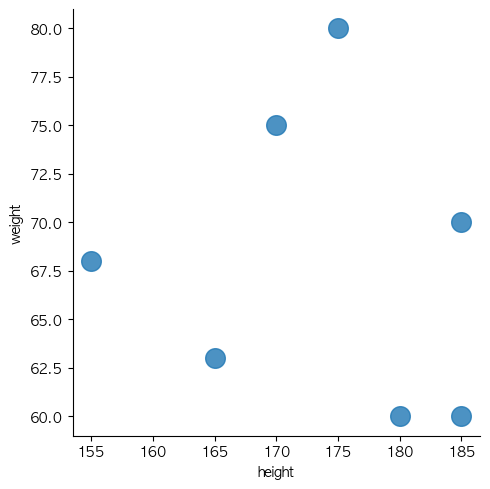

In [16]:
sns.lmplot(
    x='height',
    y='weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':200}
)
plt.show()

In [17]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [18]:
data_points = df.values
kmeans = KMeans(n_clusters=4).fit(data_points)

In [19]:
kmeans.cluster_centers_

array([[160. ,  65.5],
       [185. ,  70. ],
       [172.5,  77.5],
       [182.5,  60. ]])

In [20]:
kmeans.labels_

array([3, 3, 1, 0, 0, 2, 2], dtype=int32)

In [21]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,3
1,180,60,3
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


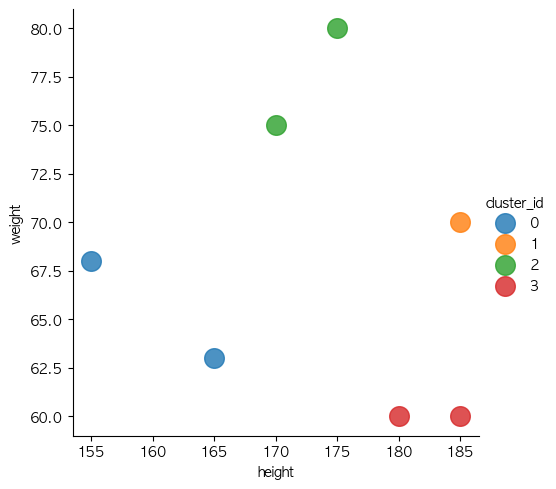

In [22]:
sns.lmplot(
    x='height',
    y='weight',
    data=df,
    hue='cluster_id',
    fit_reg=False,
    scatter_kws={'s':200}
)
plt.show()

---
### iris

In [23]:
iris = pd.read_csv('../Data/iris.csv')

In [24]:
iris['label'] = iris['Name'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [25]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [28]:
iris2['cluster_id'] = kmeans.labels_
iris2

,SepalLength,SepalWidth,PetalLength,PetalWidth,cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
(iris['label'] == iris2['cluster_id']).sum() / len(iris['label'])

0.8933333333333333

In [36]:
iris['cluster_id'] = kmeans.labels_

In [37]:
iris.iloc[[1,51,102],:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,1
102,7.1,3.0,5.9,2.1,Iris-virginica,2,2


In [40]:
accuracy_score(iris.label, iris.cluster_id)

0.8933333333333333